### View JSON

In [1]:
import json

items = []
with open("/Users/sarfrazahmad/Developer/Research/Fact-Checking/urdu-fc-wip/LLM Evaluations/freshQA/jsonl/qwen72B_fresh_qa.jsonl", "r", encoding="utf-8") as f:
    buffer = ""
    for line in f:
        line = line.strip()
        if not line:
            continue
        buffer += line
        if line.endswith("}"):
            try:
                items.append(json.loads(buffer))
                buffer = ""
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON: {e}")
                buffer = ""  # Reset buffer on error

In [2]:
len(items)

600

In [4]:
with open("/Users/sarfrazahmad/Developer/Research/Fact-Checking/urdu-fc-wip/LLM Evaluations/freshQA/jsonl/qwen72B_fresh_qa.json", "w", encoding="utf-8") as f:
    json.dump(items, f, ensure_ascii=False, indent=4)

In [14]:
items

{'claim': 'The cost of making Pirates of the Caribbean: On Stranger Tides (2011) was $376.5 million after a tax credit.',
 'label': 'false',
 'claim_urdu': 'Pirates of the Caribbean: On Stranger Tides (2011) کی تیاری کی لاگت ٹیکس کریڈٹ کے بعد $376.5 ملین تھی۔',
 'label_urdu': 'غلط'}

In [1]:
import json

with open("/Users/sarfrazahmad/Developer/Research/Fact-Checking/urdu-fc-wip/datasets/processed/qa/simpleqa/parts/simpleqa_gpt-4o_chunk_4.json", "r", encoding="utf-8") as f:
    data = json.load(f)

In [10]:
with open("/Users/sarfrazahmad/Developer/Research/Fact-Checking/urdu-fc-wip/datasets/processed/qa/simpleqa/parts/simpleqa_gpt-4o_chunk_4_ahsan.json", "w", encoding="utf-8") as f:
    json.dump(data[450:], f, ensure_ascii=False, indent=4)

In [ ]:
# with open('/Users/sarfrazahmad/Developer/Research/Fact-Checking/urdu-fc-wip/src/examples_bingcheck.json', 'w', encoding='utf-8') as file:
#     json.dump(data[:20], file, ensure_ascii=False, indent=4)

### View LangGraph

In [1]:
from IPython.display import Image

from graph_fewshot import graph

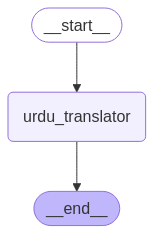

In [4]:
display(Image(graph.get_graph().draw_mermaid_png()))

### Add Exisitng Keys

In [1]:
import json

In [2]:
with open("/Users/sarfrazahmad/Developer/Research/Fact-Checking/urdu-fc-wip/datasets/processed/qa/freshqa/freshqa_gpt_4o_annotated.json", "r", encoding="utf-8") as f:
    annot = json.load(f)

In [3]:
with open("/Users/sarfrazahmad/Developer/Research/Fact-Checking/urdu-fc-wip/LLM Evaluations/freshQA/json/qwen14B_fresh_qa.json", "r", encoding="utf-8") as f:
    data = json.load(f)

In [4]:
len(data), len(annot)

(600, 600)

In [5]:
# add generated_answer_urdu key from data to annot
for i in range(len(annot)):
    annot[i]["generated_answer_urdu"] = data[i]["generated_answer_urdu"]

In [6]:
with open("/Users/sarfrazahmad/Developer/Research/Fact-Checking/urdu-fc-wip/LLM Evaluations/freshQA/Final/qwen14B_fresh_qa.json", "w", encoding="utf-8") as f:
    json.dump(annot, f, ensure_ascii=False, indent=4)

### json to jsonl

In [1]:
import json

In [2]:
path = "/Users/sarfrazahmad/Developer/Research/Fact-Checking/urdu-fc-wip/LLM Evaluations/simpleqa/json/simpleqa_answers_o4-mini.json"

In [3]:
# read json file
with open(path, "r", encoding="utf-8") as f:
    data = json.load(f)

In [4]:
# store json data as jsonl in a new file
with open(path.replace(".json", ".jsonl"), "w", encoding="utf-8") as f:
    for item in data:
        f.write(json.dumps(item, ensure_ascii=False) + "\n")

### Dup Ids

In [5]:
import json

In [6]:
path = "/Users/sarfrazahmad/Developer/Research/Fact-Checking/urdu-fc-wip/datasets/processed/qa/simpleqa/simpleqa_gpt-4o_annotated.json"

In [7]:
# read json file
with open(path, "r", encoding="utf-8") as f:
    data = json.load(f)

In [8]:
# find duplidated "id" keys
ids = {}

for item in data:
    if item["id"] in ids:
        ids[item["id"]] += 1
    else:
        ids[item["id"]] = 1
duplicates = {k: v for k, v in ids.items() if v > 1}
print(duplicates)

{'52': 2, '63': 2, '97': 2, '105': 2, '113': 2, '122': 2, '124': 2, '125': 2, '286': 2, '357': 2, '361': 2, '669': 2, '738': 2, '824': 2, '928': 2, '1163': 2, '2978': 2}
